# Einführung in Zeitreihen

## Beispiele

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline  
AirP = pd.read_csv("AirPassengers.csv")
AirP.head()

,TravelDate,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


In [2]:
AirP["TravelDate"] = pd.to_datetime(AirP["TravelDate"])
AirP.set_index("TravelDate", inplace=True)
AirP.head()

,Passengers
TravelDate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0, 0.5, 'Anzahl Passagiere (in 1000)')

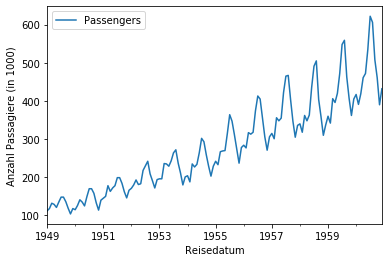

In [3]:
AirP.plot()
plt.xlabel("Reisedatum")
plt.ylabel("Anzahl Passagiere (in 1000)")

In [4]:
AusBeer = pd.read_csv("AustralianBeer.csv",sep=";",header=0)
AusBeer1 = AusBeer.copy()
AusBeer1.head()

,Quarter,Quarterly beer production in Australia: megalitres. March 1956 ? June 1994
0,1956Q1,284.4
1,1956Q2,212.8
2,1956Q3,226.9
3,1956Q4,308.4
4,1957Q1,262.0


In [5]:

AusBeer1["Quarter"] = pd.to_datetime(AusBeer["Quarter"])
AusBeer1.set_index("Quarter", inplace=True)
AusBeer1.head()

,Quarterly beer production in Australia: megalitres. March 1956 ? June 1994
Quarter,
1956-01-01,284.4
1956-04-01,212.8
1956-07-01,226.9
1956-10-01,308.4
1957-01-01,262.0


In [6]:
AusBeer1 = pd.read_csv("AustralianBeer.csv", sep=";",header=0, index_col=0, parse_dates=True)
AusBeer1.head(3)

,Quarterly beer production in Australia: megalitres. March 1956 ? June 1994
Quarter,
1956-01-01,284.4
1956-04-01,212.8
1956-07-01,226.9


In [7]:
AusBeer1.describe()

,Quarterly beer production in Australia: megalitres. March 1956 ? June 1994
count,154.000000
mean,408.267532
std,97.598588
min,212.800000
25%,325.425000
50%,427.450000
75%,466.950000
max,600.000000


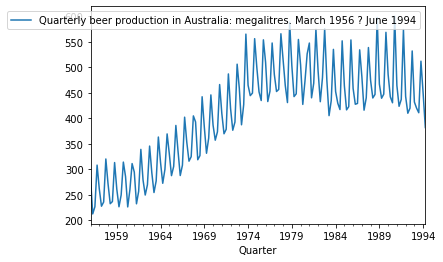

In [8]:
AusBeer1.plot()

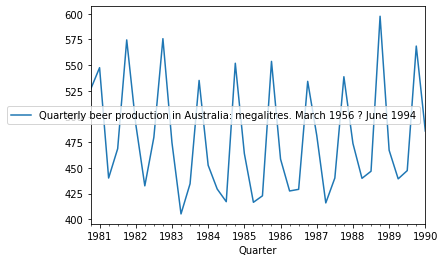

In [9]:
AusBeer1.loc["1980-9":"1990-3"].plot()

## Zeitdatenformate

In [10]:
import pandas as pd
datum = pd.to_datetime('2018-01-15 3:45pm')
print(datum)

2018-01-15 15:45:00


In [11]:
import pandas as pd
pd.to_datetime('7/8/1952')
print(pd.to_datetime('7/8/1952'))

1952-07-08 00:00:00


In [12]:
import pandas as pd
pd.to_datetime('7/8/1952', dayfirst=True)
print(pd.to_datetime('7/8/1952', dayfirst=True))

1952-08-07 00:00:00


In [13]:
import pandas as pd
pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y')
print(pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y'))

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)


### Partial-String Indexing

In [14]:
AusBeer = pd.read_csv("AustralianBeer.csv",sep=";",header=0, index_col=0, parse_dates=True)
AusBeer1 = AusBeer.copy()
AusBeer1.loc["1980"].head()


,Quarterly beer production in Australia: megalitres. March 1956 ? June 1994
Quarter,
1980-01-01,504.5
1980-04-01,427.3
1980-07-01,473.1
1980-10-01,526.2


### Multivariate Zeitreihen

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdcb40935f8>,
      dtype=object)

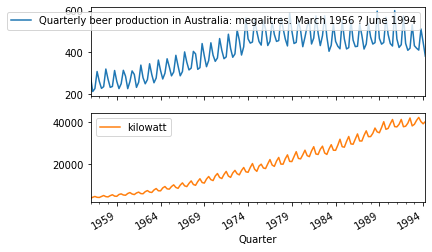

In [15]:
AusBeer = pd.read_csv("AustralianBeer.csv", sep = ";", header = 0)
AusEl = pd.read_csv("AustralianElectricity.csv", sep = ";")
Aussie = AusBeer.copy()

# Hier wird der Datensatz um eine Spalte kilowatt erweitert
Aussie["kilowatt"] = AusEl["kilowatt"]
Aussie["Quarter"] = pd.to_datetime(Aussie["Quarter"])
Aussie.set_index("Quarter", inplace = True)
Aussie.plot(subplots = True)

# Elementare Transformationen, Visualisierung und Zerlegung von Zeitreihen

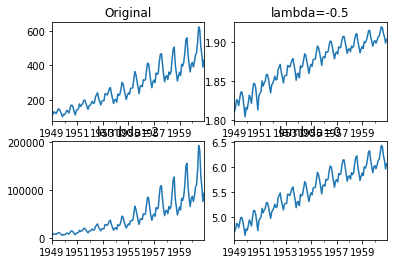

In [16]:
def boxcox(x,lambd):
    return np.log(x) if (lambd==0) else (x**lambd-1)/lambd
AirP["l_2"] = boxcox(AirP["Passengers"],2)
AirP["l_0"] = boxcox(AirP["Passengers"],0)
AirP["l_-05"] = boxcox(AirP["Passengers"],-.5)
plt.subplot(221)
AirP["Passengers"].plot()
plt.title("Original")
plt.xlabel("")
plt.subplot(222)
AirP["l_-05"].plot()
plt.title("lambda=-0.5")
plt.xlabel("")
plt.subplot(223)
AirP["l_2"].plot()
plt.title("lambda=2")
plt.xlabel("")
plt.subplot(224)
AirP["l_0"].plot()
plt.title("lambda=0")
plt.xlabel("")
plt.show()

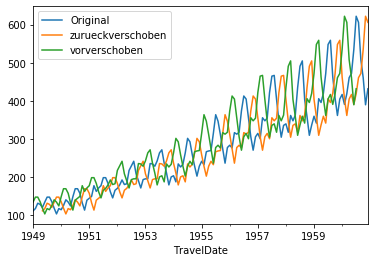

In [17]:
AirP["s_4"] = AirP["Passengers"].shift(4)
AirP["s_-5"] = AirP["Passengers"].shift(-5)
AirP["Passengers"].plot()
AirP["s_4"].plot()
AirP["s_-5"].plot()
plt.legend(["Original","zurueckverschoben","vorverschoben"])
plt.show()

In [18]:
AirQ = pd.read_csv("AirQualityUCI.csv",sep=";",decimal=",")
AirQ1 = AirQ.copy()
# pandas kennt das Zeitformat in der Tabelle nicht:
#Punkt muss durch - ersetzt werden
AirQ1["Time"] = AirQ1["Time"].str.replace(".",":")
AirQ1["Date"] = pd.to_datetime(AirQ1["Date"]+" "+AirQ1["Time"])
AirQ1.set_index("Date", inplace=True)
AirQ1.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN


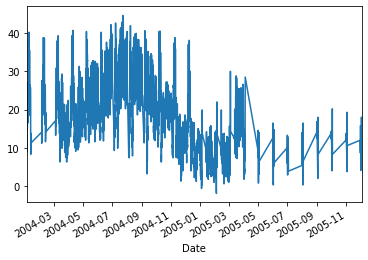

In [19]:
# Einige Werte der Temperatur sind -200. Diese Zeilen werden weggelassen
AirQ1 = AirQ1[AirQ1["T"] > -20]
AirQ1["T"].plot()
plt.show()

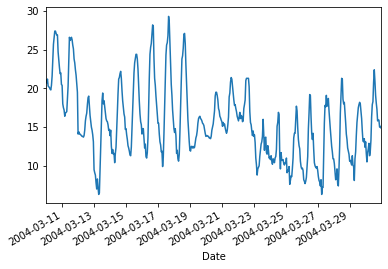

In [20]:
AirQ4 = AirQ1.loc["2004-03-10" : "2004-03-30" , "T"]
AirQ4.plot()

## Log Return

In [21]:
log_return = np.log(AirP) - np.log(AirP.shift(1))
log_return.head()

,Passengers,l_2,l_0,l_-05,s_4,s_-5
TravelDate,,,,,,
1949-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1949-02-01,0.052186,0.104379,0.010999,0.002684,NaN,0.091937
1949-03-01,0.112117,0.224249,0.023229,0.005512,NaN,0.000000
1949-04-01,-0.022990,-0.045982,-0.004719,-0.001103,NaN,-0.084557
1949-05-01,-0.064022,-0.128052,-0.013261,-0.003145,NaN,-0.133531


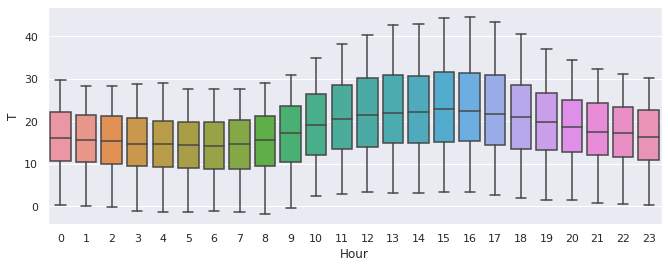

In [22]:
# Use seaborn style defaults and set the default figure size
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
AirQ1['Hour'] = AirQ1.index.hour
AirQ4 = AirQ1.loc["2004-3-10" : "2004-3-30"]
sns.boxplot(data=AirQ1, x='Hour', y="T")

### Datenaggregation

In [23]:
# Resample to weekly frequency, aggregating with mean
AirQ1_weekly_mean = AirQ1['T'].resample('W').mean()
AirQ1_weekly_mean.head(3)

Date
2004-01-04    15.519048
2004-01-11    24.579641
2004-01-18    10.891667
Freq: W-SUN, Name: T, dtype: float64

In [24]:
AirQ1_monthly_mean = AirQ1['T'].resample('M').mean()
AirQ1_monthly_mean.head(3)
print(AirQ1_monthly_mean.head(12))

Date
2004-01-31    22.132547
2004-02-29    23.225926
2004-03-31    17.661756
2004-04-30    19.131790
2004-05-31    22.074924
2004-06-30    25.250984
2004-07-31    27.235224
2004-08-31    26.269622
2004-09-30    22.377778
2004-10-31    19.988938
2004-11-30    14.775000
2004-12-31    13.054545
Freq: M, Name: T, dtype: float64


## Lag Plots

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


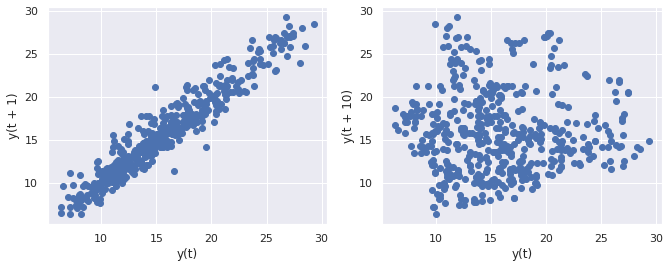

In [25]:
import numpy as np
from pandas.plotting import lag_plot

AirQ4 = AirQ1.loc["2004-03-10" : "2004-03-30" , "T"]
plt.subplot(121)
lag_plot(AirQ4)
plt.subplot(122)
lag_plot(AirQ4, 10)
plt.show()

# Zerlegen von Zeitreihen in Trend, Saisonale Komponente und Restterm

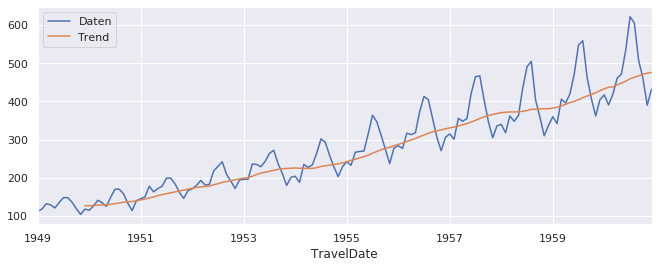

In [26]:
AirP["Trend"] = AirP["Passengers"].rolling(window=12).mean()
AirP["Passengers"].plot()
AirP["Trend"].plot()
plt.legend(["Daten","Trend"])
plt.show()

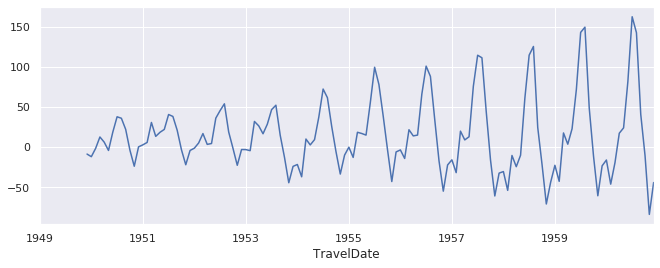

In [27]:
AirP["Season"] = AirP["Passengers"]-AirP["Trend"]
AirP["Season"].plot()
plt.show()

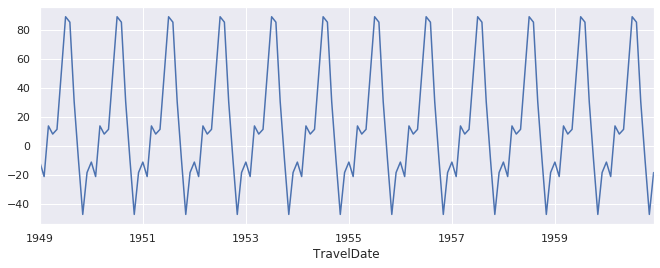

In [28]:
AirP2 = AirP["Season"].values.reshape((12,12))
# Entlang der Spalten (axis=0) wird der Mittelwert berechnet
# nanmean bedeutet, die NaN werden ignoriert
ave = np.nanmean(AirP2,axis=0)
# Der Vektor ave wird verzwölfacht,
# damit er wieder die gleiche Länge hat, wie AirP[’Season’]
AirP["Season_ave"] = np.tile(A=ave, reps=12)
AirP["Season_ave"].plot()
plt.show()

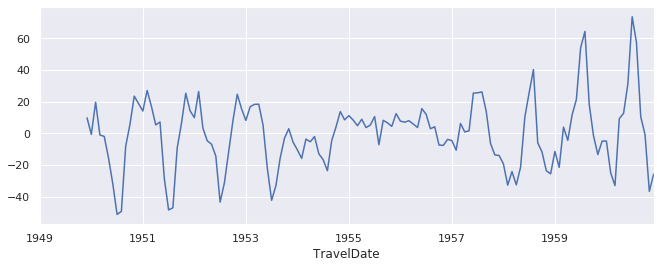

In [29]:
AirP["Residual"] = AirP["Season"]- AirP["Season_ave"]
AirP["Residual"].plot()
plt.show()

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(AirP["Passengers"], model="additive", freq=12).plot()
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
seasonal_decompose(np.log(AirP["Passengers"]), model="add").resid.plot()
plt.show()

In [ ]:
# Installation von stldecompose : !pip install stldecompose
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         mean, 
                                         seasonal_naive)
AirQ1.head()


decompose(np.log(AirP["Passengers"]), period = 12).plot();

